# Abstract 

In [ ]:
Talk about your data with a cool image

<img src="http://static.snopes.com/app/uploads/2017/01/titanic_sinking_tw.jpg" style="width:300px">

We chose this dataset because it is well studied but also well known to be non-trivial to get good answers from it.

Perhaps even an appropriate movie

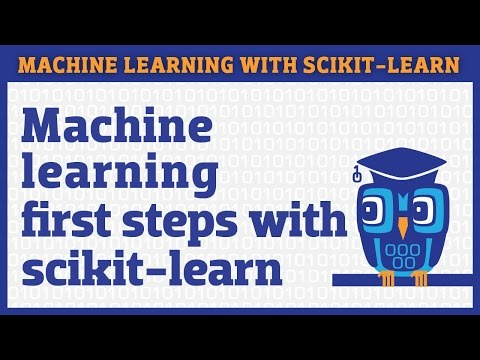

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hd1W4CyPX58')

In [4]:
#dataPath = 'UCIMLR/BreastCancer/breastcancer'
dataPath = 'UCIMLR/Iris/iris'
#dataPath = 'UCIMLR/Parkinsons/parkinsons'
#dataPath = 'UCIMLR/Wine/wine'

In [5]:
print(open(dataPath+'.txt', 'r').read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

# Loading in the libraries.

In [6]:
# Old libraries that we know and love.
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline

# Introduction

Read in the data

In [7]:
data = pa.read_csv(dataPath+'.csv')

The size of our data was 

In [8]:
data.shape

(150, 5)

One measurement

In [9]:
data.iloc[0,:]

sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
flower type     0.0
Name: 0, dtype: float64

# Looking at the data

In [10]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

In [11]:
X[0,:]

array([ 5.1,  3.5,  1.4,  0.2])

Do a little preprocessing of the data

In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Add a new predictor which is the square of the first predictor

In [13]:
XNew = X[:,[0]]**2
np.append(X, XNew, axis=1)

array([[  2.22222222e-01,   6.25000000e-01,   6.77966102e-02,
          4.16666667e-02,   4.93827160e-02],
       [  1.66666667e-01,   4.16666667e-01,   6.77966102e-02,
          4.16666667e-02,   2.77777778e-02],
       [  1.11111111e-01,   5.00000000e-01,   5.08474576e-02,
          4.16666667e-02,   1.23456790e-02],
       [  8.33333333e-02,   4.58333333e-01,   8.47457627e-02,
          4.16666667e-02,   6.94444444e-03],
       [  1.94444444e-01,   6.66666667e-01,   6.77966102e-02,
          4.16666667e-02,   3.78086420e-02],
       [  3.05555556e-01,   7.91666667e-01,   1.18644068e-01,
          1.25000000e-01,   9.33641975e-02],
       [  8.33333333e-02,   5.83333333e-01,   6.77966102e-02,
          8.33333333e-02,   6.94444444e-03],
       [  1.94444444e-01,   5.83333333e-01,   8.47457627e-02,
          4.16666667e-02,   3.78086420e-02],
       [  2.77777778e-02,   3.75000000e-01,   6.77966102e-02,
          4.16666667e-02,   7.71604938e-04],
       [  1.66666667e-01,   4.5833333

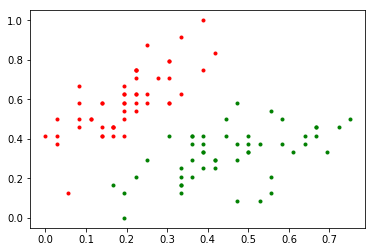

In [14]:
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')

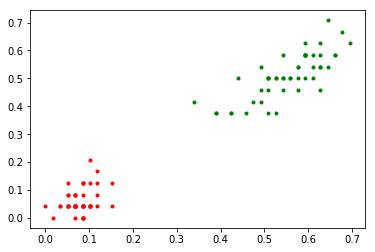

In [15]:
py.plot(X[y==0,2],X[y==0,3],'r.')
py.plot(X[y==1,2],X[y==1,3],'g.')

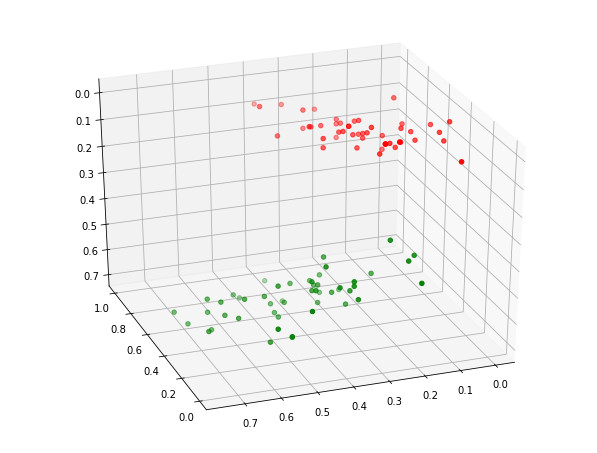

In [16]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='r')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='g')
py.show()

# Data processing

##  Principle Component Analysis (PCA)

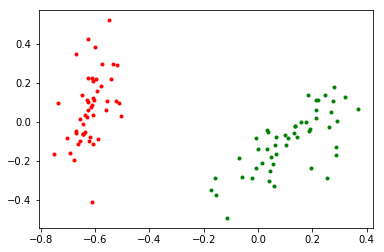

In [17]:
from sklearn.decomposition import PCA

XPCA = PCA(n_components=3).fit_transform(X)
py.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
py.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')

Just as one can project from a high dimensional space to a two-dimensional space, one can also do the same thing to project to a three-dimensional space.

# Our first classification tool, K-Nearest Neighbors.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. 

p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
Additional keyword arguments for the metric function.

In [18]:
# Import the K-NN solver
from sklearn import neighbors

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

C : float, optional (default=1.0)
Penalty parameter C of the error term.

loss : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)
Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.

penalty : string, ‘l1’ or ‘l2’ (default=’l2’)
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

class_weight : {dict, ‘balanced’}, optional
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [62]:
# Load in a classifier
from sklearn import svm

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

max_depth : int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

max_leaf_nodes : int or None, optional (default=None)
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

class_weight : dict, list of dicts, “balanced” or None, optional (default=None)
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [63]:
# Decision tree classifier
from sklearn import tree

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

n_components : int, optional
Number of components (< n_classes - 1) for dimensionality reduction.

In [64]:
# Linear Disciminant Analysis
from sklearn import discriminant_analysis

In [65]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    # This score is the Jaccard Index
    # https://en.wikipedia.org/wiki/Jaccard_index
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

## Basic tests

Thinking about what must have to been going on, we decided to try a different projection of the data.

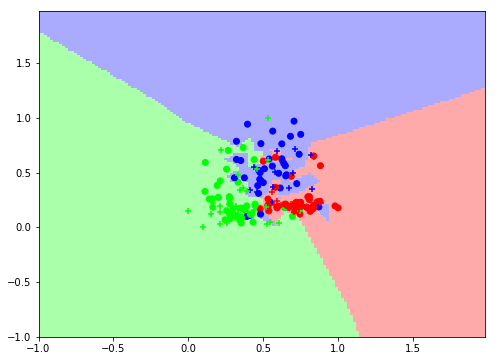

training score 1.0
testing score 0.770491803279


In [66]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
runTest(clf,X[:,[0,1]],y)

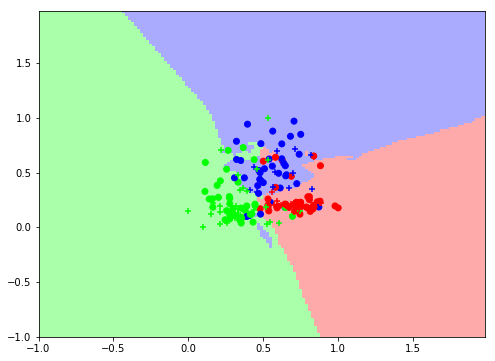

training score 0.811965811966
testing score 0.803278688525


In [67]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[0,1]],y)

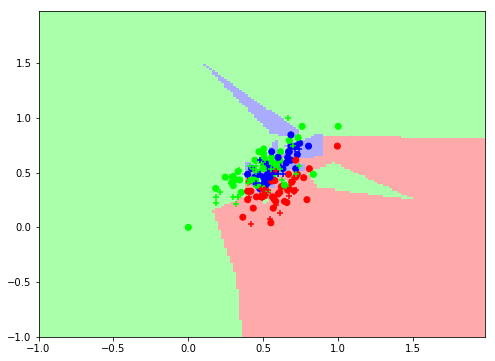

training score 0.982905982906
testing score 0.655737704918


In [68]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
runTest(clf,X[:,[2,3]],y)

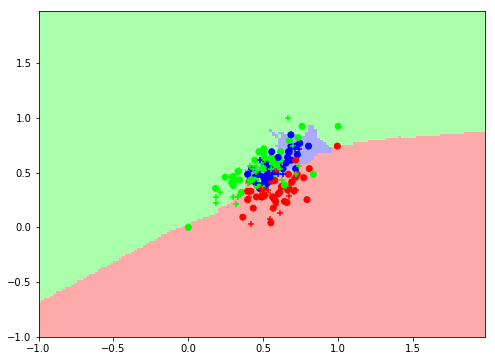

training score 0.760683760684
testing score 0.590163934426


In [69]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[2,3]],y)

## More advanced techniques and other explorations

Getting just a bit fancier, we actually do PCA!!

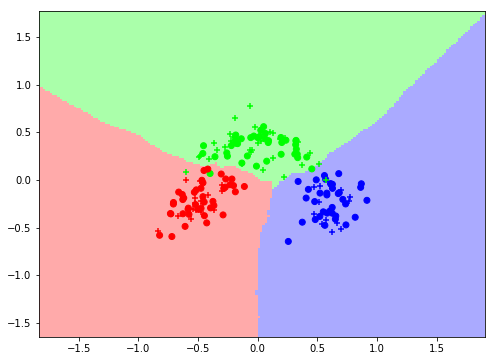

training score 0.982905982906
testing score 0.950819672131


In [70]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y)

What happens if we reduce the training data by a lot?

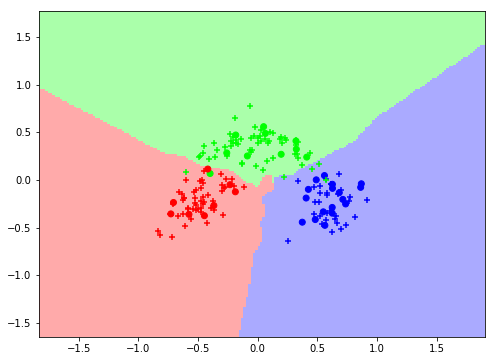

training score 0.971428571429
testing score 0.965034965035


In [71]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y, trainingPercent = 0.2)

## Linear SVC

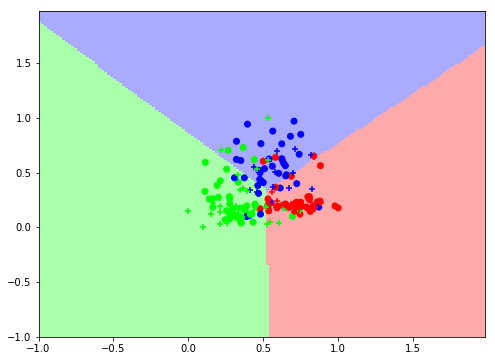

training score 0.811965811966
testing score 0.754098360656


In [72]:
clf = svm.LinearSVC()
runTest(clf,X[:,[0,1]],y)

## Decision Tree

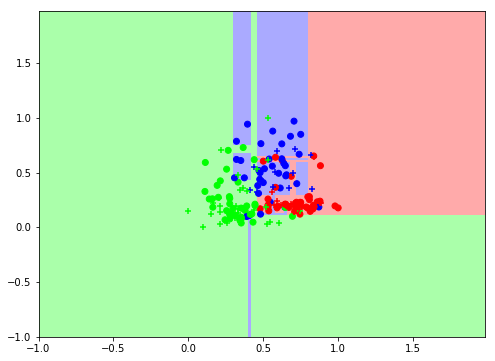

training score 1.0
testing score 0.770491803279


In [73]:
clf = tree.DecisionTreeClassifier()
runTest(clf,X[:,[0,1]],y)

## Linear Discriminant Analysis

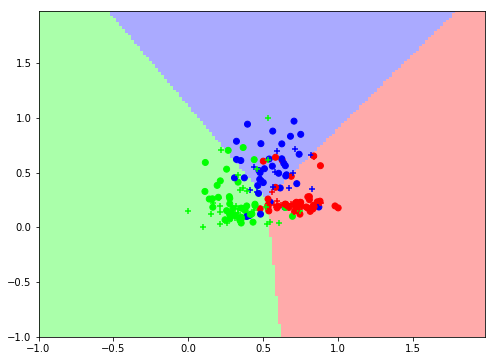

training score 0.820512820513
testing score 0.803278688525


In [74]:
clf = discriminant_analysis.LinearDiscriminantAnalysis()
runTest(clf,X[:,[0,1]],y)